# Bank Marketing Data Set

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information:

### Input variables:

##### Bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


##### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). 


##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


##### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Setup Imports and Variables

In [1]:
import pandas as pd
import numpy as np
#import pylab as plt
import matplotlib.pyplot as plt


# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
figsize_with_subplots = (18, 30)

# Size of matplotlib histogram bins
bin_size = 10

# Importing data, Exploratory Data Analysis and Imputing Missing values

## Import and Explore Data

Read the data:

In [2]:
df = pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


View the data types of each column:

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Get some basic information on the DataFrame:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

job, marital, education, default, housing and loan have missing values. 

Generate various descriptive statistics on the DataFrame:

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Now that we have a general idea of the data set contents, we can dive deeper into each column. 
We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

Plot a few features to get a better idea of each:

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

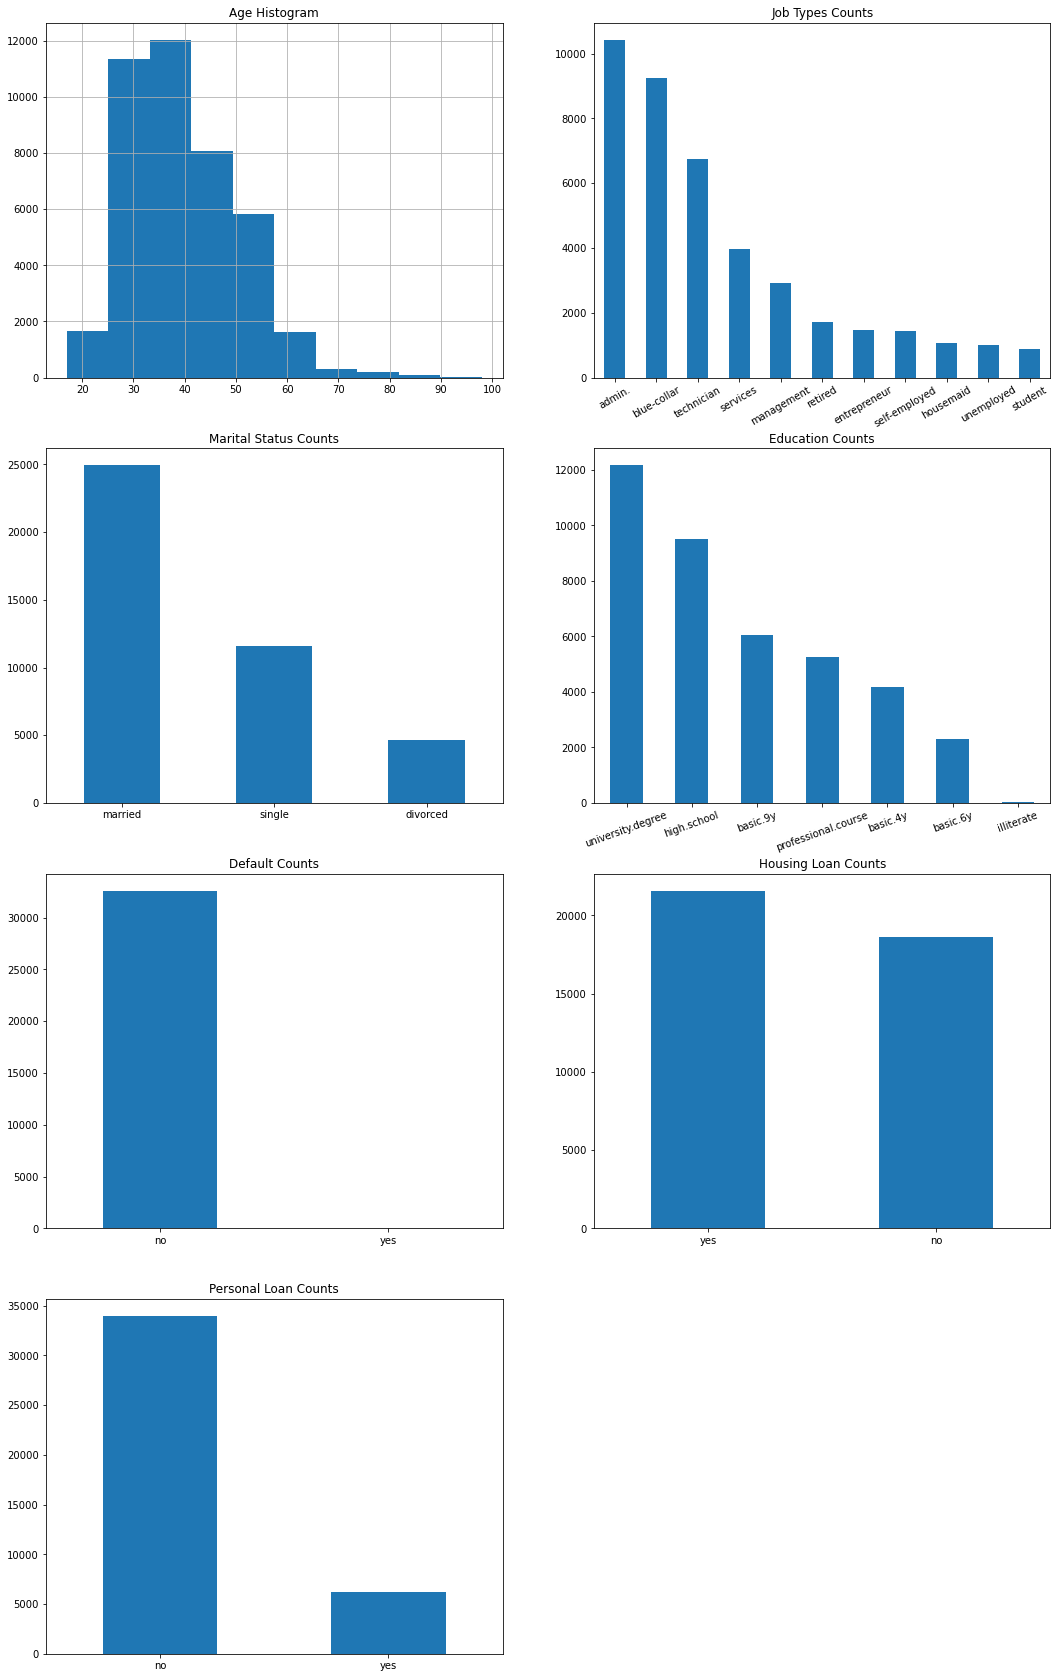

In [8]:
# Set up a grid of plots
fig = plt.figure(figsize=figsize_with_subplots) 
fig_dims = (4, 2)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 0))
df['age'].hist()
plt.title('Age Histogram')

# Plot job types counts
plt.subplot2grid(fig_dims, (0, 1))
df['job'].value_counts().plot(kind='bar', title='Job Types Counts')
plt.xticks(rotation=30)

# Plot marital status counts
plt.subplot2grid(fig_dims, (1, 0))
df['marital'].value_counts().plot(kind='bar', title='Marital Status Counts')
plt.xticks(rotation=0)

# Plot education counts
plt.subplot2grid(fig_dims, (1, 1))
df['education'].value_counts().plot(kind='bar', title='Education Counts')
plt.xticks(rotation=20)

# Plot 'has credit in default?' counts
plt.subplot2grid(fig_dims, (2, 0))
df['default'].value_counts().plot(kind='bar', title='Default Counts')
plt.xticks(rotation=0)

# Plot 'has housing loan?' counts
plt.subplot2grid(fig_dims, (2, 1))
df['housing'].value_counts().plot(kind='bar', title='Housing Loan Counts')
plt.xticks(rotation=0)

# Plot 'has personal loan?' counts
plt.subplot2grid(fig_dims, (3, 0))
df['loan'].value_counts().plot(kind='bar', title='Personal Loan Counts')
plt.xticks(rotation=0)



Next we'll explore various features to view their impact on term deposit subscription.

## Feature Age

## Feature: Job

<AxesSubplot:title={'center':'Subscription by Job'}, xlabel='job'>

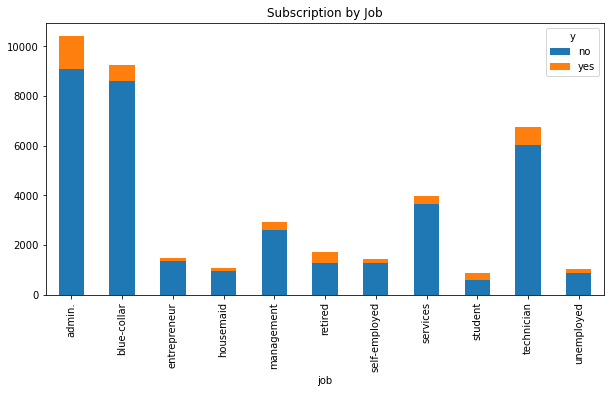

In [9]:
job_val_xt = pd.crosstab(df['job'], df['y'])
job_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Job')

<AxesSubplot:title={'center':'Subscription Rate by Job'}, xlabel='job'>

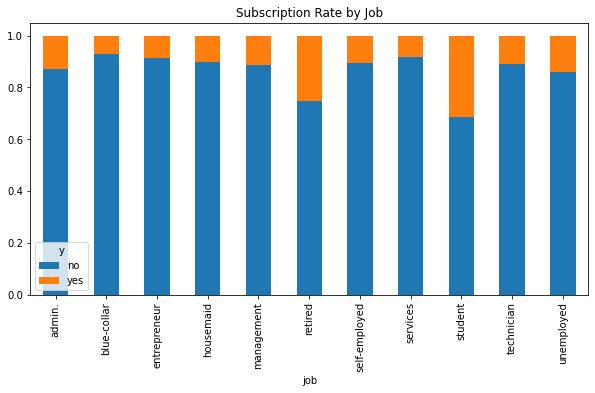

In [10]:
job_val_xt_pct = job_val_xt.div(job_val_xt.sum(1).astype(float), axis=0)
job_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Job')

* Clients with administrative job are contacted more than other clients as they have the most subscriptions. 
* Entreprenuer and self-employed clients are contacted less and also have less subscription of term-deposit as they would prefer to invest their money in their own businesses.
* Housemaid, retired, student and unemployed are also contacted less compared to other clients. 
* But you can see that the Subscription Rate for retired and students is the highest. More students and retired clients can be contacted to improve subscription rate.

In [11]:
df.job.isna().sum()

330

In [12]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

Imputing missing values:

Since the majority of clients have job 'admin.' we assign the missing values in job to 'admin.'.

In [13]:
df['job'].replace(np.NaN, 'admin.',inplace = True)

## Feature: Marital

In [14]:
df.marital.isna().sum()

80

In [15]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

Imputing missing values:

Since the majority of clients have marital status as 'married' we assign the missing values in marital to 'married'.

In [16]:
df['marital'].replace(np.NaN, 'married',inplace = True)

## Feature: Education

In [17]:
df.education.isna().sum()

1731

In [18]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

Imputing missing values:

Since the majority of clients have education as 'university.degree' we assign the missing values in education to 'university.degree'.

In [19]:
df['education'].replace(np.NaN, 'university.degree',inplace = True)

## Feature: Default

<AxesSubplot:title={'center':'Subscription Rate by Default'}, xlabel='default'>

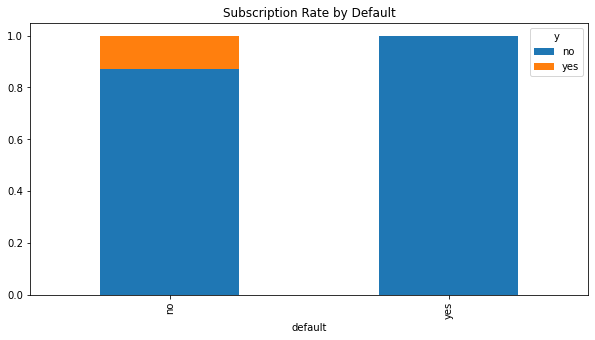

In [20]:
default_val_xt = pd.crosstab(df['default'], df['y'])
default_val_xt_pct = default_val_xt.div(default_val_xt.sum(1).astype(float), axis=0)
default_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Default')

If the client has credit in default, he will not subscribe for the term loan

In [21]:
df.default.isna().sum()

8597

In [22]:
df.default.value_counts()

no     32588
yes        3
Name: default, dtype: int64

Imputing missing values:

Since the majority of clients have default as 'no' we assign the missing values in default to 'no'.

In [23]:
df['default'].replace(np.NaN, 'no',inplace = True)

## Feature: Housing

<AxesSubplot:title={'center':'Subscription by Housing Loan'}, xlabel='housing'>

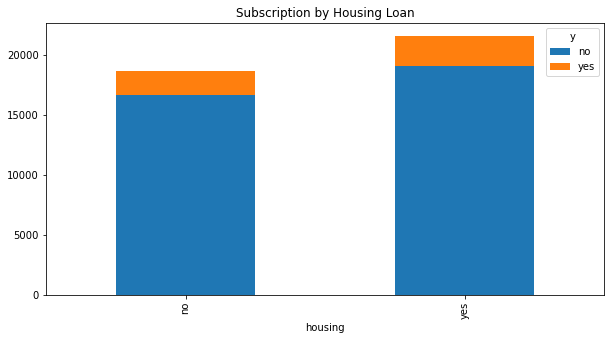

In [24]:
housing_val_xt = pd.crosstab(df['housing'], df['y'])
housing_val_xt.plot(kind = 'bar', stacked=True, title='Subscription by Housing Loan')

<AxesSubplot:title={'center':'Subscription Rate by Housing Loan'}, xlabel='housing'>

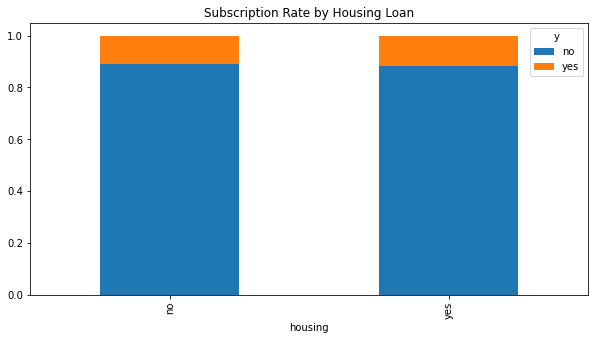

In [25]:
housing_val_xt_pct = housing_val_xt.div(housing_val_xt.sum(1).astype(float), axis=0)
housing_val_xt_pct.plot(kind='bar', stacked=True, title='Subscription Rate by Housing Loan')

In [26]:
df.housing.isna().sum()

990

In [27]:
df.housing.value_counts()

yes    21576
no     18622
Name: housing, dtype: int64

Imputing missing values:

Since the majority of clients have housing as 'yes' we assign the missing values in housing to 'yes'.

In [28]:
df['housing'].replace(np.NaN, 'yes',inplace = True)

## Feature: Loan

In [29]:
df.loan.isna().sum()

990

In [30]:
df.loan.value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

Imputing missing values:

Since the majority of clients have housing as 'yes' we assign the missing values in housing to 'yes'.

In [31]:
df['loan'].replace(np.NaN, 'no',inplace = True)

# Data Preprocessing 

In [32]:
X = df.drop('y', axis=1)
y = df['y']

## Handling Categorical values

We replace the column **job** with a one-hot-vector of length 11.

In [33]:
cols = pd.get_dummies(X['job'], prefix= 'job')
X[cols.columns] = cols
X.drop('job', axis = 1, inplace = True)

We replace the column **marital** with a one-hot-vector of length 3.

In [34]:
cols = pd.get_dummies(X['marital'], prefix= 'marital')
X[cols.columns] = cols
X.drop('marital', axis = 1, inplace = True)

We replace the column **education** with a one-hot-vector of length 7.

In [35]:
cols = pd.get_dummies(X['education'], prefix= 'education')
X[cols.columns] = cols
X.drop('education', axis = 1, inplace = True)

The frequent class in column **default** is no, so we map 'no' to 1 and 'yes' to 0.

In [36]:
X['default'] = X['default'].map({'no':1, 'yes':0}).astype(int)

The frequent class in column **housing** is yes, so we map 'yes' to 1 and 'no' to 0.

In [37]:
X['housing'] = X['housing'].map({'yes':1, 'no':0}).astype(int)

The frequent class in column **loan** is no, so we map 'no' to 1 and 'yes' to 0.

In [38]:
X['loan'] = X['loan'].map({'no':1, 'yes':0}).astype(int)

The frequent class in column **contact** is cellular, so we map 'cellular' to 1 and 'telephone' to 0.

In [39]:
X['contact'] = X['contact'].map({'cellular':1, 'telephone':0}).astype(int)

We replace the column **month** with a one-hot-vector of length 12.

In [40]:
cols = pd.get_dummies(X['month'], prefix= 'month')
X[cols.columns] = cols
X.drop('month', axis = 1, inplace = True)

We replace the column **day_of_week** with a one-hot-vector of length 7.

In [41]:
cols = pd.get_dummies(X['day_of_week'], prefix= 'day_of_week')
X[cols.columns] = cols
X.drop('day_of_week', axis = 1, inplace = True)

We replace the column **poutcome** with a one-hot-vector of length 3.

In [ ]:
cols = pd.get_dummies(X['poutcome'], prefix= 'poutcome')
X[cols.columns] = cols
X.drop('poutcome', axis = 1, inplace = True)

## Splitting Data

Splitting data into train, valid and test sets

In [43]:
from sklearn.model_selection import train_test_split

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 23168   size of validation set: 7723   size of test set: 10297



In [44]:
X_train.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
38251,48,1,0,1,1,61,1,999,0,-3.4,...,1,0,0,0,0,1,0,0,1,0
8265,43,1,0,0,0,75,1,999,0,1.4,...,0,0,0,0,0,1,0,0,1,0
5249,23,1,1,1,0,250,1,999,0,1.1,...,0,0,1,0,0,0,0,0,1,0
10033,42,1,1,1,0,135,3,999,0,1.4,...,0,0,0,0,1,0,0,0,1,0
29278,37,1,0,1,1,606,2,1,1,-1.8,...,0,0,1,0,0,0,0,0,0,1


## Dummy Classifier - Base model

In [45]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_trainval, y_trainval)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: ['no']
Test score: 0.89


## Droping unwanted features
'duration' is the last contact duration, in seconds (numeric).

This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed.

Also, after the end of the call y is obviously known. Thus, this feature should only be included for benchmark purposes and should be discarded to have a realistic predictive model.

In [46]:
X_train = X_train.drop('duration', axis=1)
X_valid = X_valid.drop('duration', axis=1)
X_test = X_test.drop('duration', axis=1)
X_trainval = X_trainval.drop('duration', axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23168 entries, 38251 to 7392
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            23168 non-null  int64  
 1   default                        23168 non-null  int32  
 2   housing                        23168 non-null  int32  
 3   loan                           23168 non-null  int32  
 4   contact                        23168 non-null  int32  
 5   campaign                       23168 non-null  int64  
 6   pdays                          23168 non-null  int64  
 7   previous                       23168 non-null  int64  
 8   emp.var.rate                   23168 non-null  float64
 9   cons.price.idx                 23168 non-null  float64
 10  cons.conf.idx                  23168 non-null  float64
 11  euribor3m                      23168 non-null  float64
 12  nr.employed                    23168 non-nu

In [47]:
X_train.describe()

,age,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,...,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000,23168.000000
mean,39.983512,0.999914,0.549810,0.848757,0.636999,2.550112,962.910955,0.172695,0.083978,93.577214,...,0.017610,0.014632,0.188450,0.209081,0.208434,0.194018,0.200017,0.103073,0.863821,0.033106
std,10.455380,0.009291,0.497524,0.358293,0.480875,2.751266,185.839329,0.495155,1.570912,0.578608,...,0.131534,0.120078,0.391079,0.406661,0.406198,0.395451,0.400022,0.304061,0.342986,0.178917
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,1.000000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,1.000000,1.000000,1.000000,1.000000,2.000000,999.000000,0.000000,1.100000,93.749000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,1.000000,1.000000,1.000000,1.000000,3.000000,999.000000,0.000000,1.400000,93.994000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,56.000000,999.000000,7.000000,1.400000,94.767000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# K Neighbors Classifier

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)